# Housing Project_P2_HAK
Student name: Hera K.

Student pace: full time

Scheduled project review date/time: 03/10/2023

Instructor name: Daniel Burdeno

Blog post URL:

# Overview

## Business Problem

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder.The description of the column names can be found in column_names.md in the same folder. Houses have much more numeric information such as square footage of living space in the home, square footage of the lot/ basement/outdoor space, coordinates of houses etc, number of rooms, year when house was built or renovated, and some chategorical data cush as address, qualit of view, construction 

In [332]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss, seed
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
# from lin_reg import best_line

%matplotlib inline

In [333]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [335]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [336]:
df.shape

(30155, 25)

# Cleaning Duplicate Rows

In [337]:
# Displays how many rows are duplicated

df.duplicated().sum()

1

In [338]:
# Displays which row is duplicated

df.loc[df.duplicated() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [339]:
# Drops duplicated rows

df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


# Cleaning Null Info (Missing Data) 

In [340]:
# Displays how many missing info is available on the below table list

df.isna().sum()


id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [341]:
# Drops missing info and cleans data 

df_cleaned= df.dropna(subset=['heat_source','sewer_system']) 
df_cleaned.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [342]:
# Checks cleaned data lenght 

len(df_cleaned)

30111

In [343]:
# Descriptive analysis of cleaned data 
# There is no much significant difference about descriptive analysis between raw data and cleaned data, 
# because there was not too much missing info

df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# The most Correlated Data 

In [344]:
# Correlation table X (independent) variables between Y (dependent) 

df_cleaned.corr()['price'].sort_values(ascending= False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [345]:
# The most correlated X variable with Y 

most_correlated = 'sqft_living'

In [346]:
# Counts the number of occurrences of each value that this column takes

df_cleaned['sqft_living'].value_counts()

1250    192
1400    190
1560    183
1900    183
1540    181
       ... 
2281      1
2265      1
2105      1
2089      1
2049      1
Name: sqft_living, Length: 1314, dtype: int64

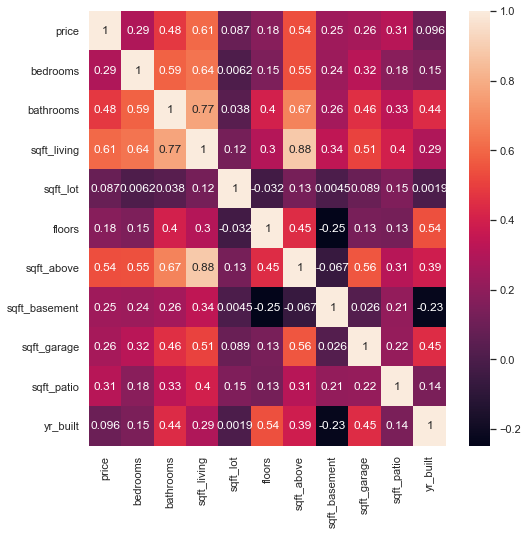

In [676]:
# Checking the correlation visual as a heatmap among each other all data

sns.set(rc={'figure.figsize':(8, 8)})
sns.heatmap(df_cleaned.corr(), annot=True);

INTERPRETATION THE HEATMAP : 

    The table displays individual correlation relationship among each other all data, how impact each other and how correlated each other. 
    
    The most highly correlated each other variables : Bathromm, bedroom, sqft_above, sqft_living 
    
    (The correlation variables has been choosen from the table)

In [677]:
# The correlation (sorted, descending, absolute ) all variables associated to price (target) 

df_cleaned_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
df_cleaned_corrs

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
id               0.034184
long             0.022509
Name: price, dtype: float64

### Plotting the Predictor vs. Price

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

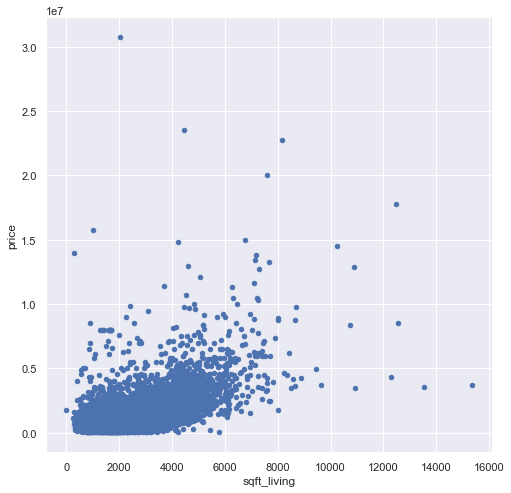

In [678]:
# Plot all data points, most_correlated vs. price
# y = 'price'
# x = most_correlated

df_cleaned.plot.scatter(x=most_correlated, y="price")

INTERPRETATION THE PLOT:

The scatter plot displays that price and square footage of living space in the home is highly correlated. It is a strong positive correlation. 1000-6000 sqft of living space is the most correlated with price.

# Dummying Code


In [349]:
# yr_renovated columns has been turned into catergorical data. 
# We should 

df_cleaned['yr_renovated'] = df_cleaned['yr_renovated'].astype('str')
df_cleaned.head()

<ipython-input-349-06930adfb2e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['yr_renovated'] = df_cleaned['yr_renovated'].astype('str')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [351]:
df_cleaned.shape

(30111, 25)

In [350]:
# We can see yr_renovated data is as object any more

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [352]:
# Removes the rows that contains NULL values

df_cleaned.dropna(inplace=True)
pd.get_dummies(df_cleaned, columns=['yr_renovated'], drop_first=True)

<ipython-input-352-e1e256f14c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(inplace=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_renovated_2013,yr_renovated_2014,yr_renovated_2015,yr_renovated_2016,yr_renovated_2017,yr_renovated_2018,yr_renovated_2019,yr_renovated_2020,yr_renovated_2021,yr_renovated_2022
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,0,0,0,0,0,0,0,0,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0


In [353]:
# Convert categorical variables into dummy or indicator variables

yr_renovated_dummies = pd.get_dummies(df_cleaned['yr_renovated'])
yr_renovated_dummies

,0,1924,1928,1940,1942,1945,1946,1947,1948,1949,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [494]:
# Dropped 0 year column from the table

yr_renovated_dummies2 =yr_renovated_dummies.drop(['0'], axis=1)
yr_renovated_dummies2

,1924,1928,1940,1942,1945,1946,1947,1948,1949,1950,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [649]:
len(yr_renovated_dummies2)

30111

In [495]:
yr_renovated_dummies2.sum()

1924     1
1928     2
1940     3
1942     1
1945     2
        ..
2018    44
2019    35
2020    28
2021    69
2022    13
Length: 81, dtype: int64

In [496]:
df_cleaned['yr_renovated']

0        0
1        0
2        0
3        0
4        0
        ..
30150    0
30151    0
30152    0
30153    0
30154    0
Name: yr_renovated, Length: 30111, dtype: object

In [497]:
# Selected only numeric columns 

X_nums = df_cleaned.select_dtypes(include='number')
X_nums

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006,47.449490,-122.18908


In [364]:
#  The info() function is used to print a concise summary of the DataFrame.

X_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   sqft_above     30111 non-null  int64  
 8   sqft_basement  30111 non-null  int64  
 9   sqft_garage    30111 non-null  int64  
 10  sqft_patio     30111 non-null  int64  
 11  yr_built       30111 non-null  int64  
 12  lat            30111 non-null  float64
 13  long           30111 non-null  float64
dtypes: float64(5), int64(9)
memory usage: 4.7 MB


In [503]:
# Dropped below columns 

X_nums.drop(['lat', 'id', 'long'], axis=1, inplace=True)
X_nums.head()

/Users/ocean/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012


# Before we add these dummies to our data let's scale our numerical variables:

In [389]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [390]:
ss_not_fit = StandardScaler()

In [475]:
# Instanstiate SS from sklearn
ss = StandardScaler()

# Fit on data 
ss.fit(X_nums)

StandardScaler()

In [476]:
ss.mean_

array([1.10897065e+06, 3.41519710e+00, 2.33570788e+00, 2.11334280e+03,
       1.66487991e+04, 1.54350570e+00, 1.81038966e+03, 4.76617117e+02,
       3.30475308e+02, 2.17451264e+02, 1.97516230e+03])

In [477]:
ss.scale_

array([8.96500943e+05, 9.79739050e-01, 8.88278552e-01, 9.73437095e+02,
       5.99320346e+04, 5.67780005e-01, 8.77711764e+02, 5.79795727e+02,
       2.85720275e+02, 2.45297918e+02, 3.20523974e+01])

In [504]:
X_nums.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012


In [534]:
# Transform data

X_nums_sc = ss.transform(X_nums)
X_nums_sc

array([[-0.48407161,  0.59689659, -1.50370385, ..., -1.15663933,
        -0.72341121, -0.19225705],
       [-0.2107869 ,  1.61757653,  0.18495563, ..., -1.15663933,
         0.09192388, -0.78503643],
       [-0.8900946 ,  2.63825648, -0.37793086, ..., -1.15663933,
        -0.88647823, -0.59784294],
       ...,
       [-0.34464063, -0.42378336, -0.37793086, ..., -0.31665694,
        -0.43804393,  0.61891472],
       [-0.37252683, -0.42378336,  0.18495563, ...,  0.52332545,
        -0.47881068,  0.96210278],
       [-0.67927497, -0.42378336, -0.94081736, ...,  0.31332985,
        -0.88647823, -0.31705271]])

In [535]:
X_nums_scaled = pd.DataFrame(X_nums_sc, columns=X_nums.columns, index= list(X_nums.index))
X_nums_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
0,-0.484072,0.596897,-1.503704,-0.958812,-0.158660,-0.957247,-0.718219,-0.822043,-1.156639,-0.723411,-0.192257
1,-0.210787,1.617577,0.184956,0.674576,-0.165951,-0.957247,-0.273882,1.885807,-1.156639,0.091924,-0.785036
2,-0.890095,2.638256,-0.377931,0.787578,-0.175078,-0.957247,-0.262489,1.903055,-1.156639,-0.886478,-0.597843
3,-0.372527,-0.423783,0.747842,0.047930,-0.254435,0.803999,-0.820759,1.023434,-0.456654,0.214224,1.086898
4,-0.576096,-1.444463,-0.377931,-1.020449,-0.265147,0.803999,-0.786579,0.126567,0.768320,-0.764178,1.149296
...,...,...,...,...,...,...,...,...,...,...,...
30150,0.497522,1.617577,-0.377931,-0.208892,-0.211052,-0.076624,-0.239702,1.126919,-1.156639,-0.030376,-1.689805
30151,0.227584,-0.423783,-0.377931,-0.095890,-0.181018,0.803999,0.238815,-0.822043,-1.156639,1.233393,1.118097
30152,-0.344641,-0.423783,-0.377931,-0.506805,-0.217727,-0.957247,-0.991658,0.764723,-0.316657,-0.438044,0.618915
30153,-0.372527,-0.423783,0.184956,0.469118,-0.229590,0.803999,0.022343,0.454268,0.523325,-0.478811,0.962103


In [536]:
#Now let's add the dummies to our DataFrame: 

grade_con_dummies = pd.get_dummies(df_cleaned[['grade', 'condition']])
grade_con_dummies

,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
30151,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
30152,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
30153,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [537]:
# Dropped condition_Poor and grade_2 Substandard columns 

grade_con_dummies2 = grade_con_dummies.drop(['condition_Poor', 'grade_2 Substandard'], axis=1)
grade_con_dummies2

,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30151,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
30152,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
30153,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [538]:
# Concatenated the columns

X = pd.concat([X_nums_scaled, grade_con_dummies2, yr_renovated_dummies2], axis=1)
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.484072,0.596897,-1.503704,-0.958812,-0.158660,-0.957247,-0.718219,-0.822043,-1.156639,-0.723411,...,0,0,0,0,0,0,0,0,0,0
1,-0.210787,1.617577,0.184956,0.674576,-0.165951,-0.957247,-0.273882,1.885807,-1.156639,0.091924,...,0,0,0,0,0,0,0,0,0,0
2,-0.890095,2.638256,-0.377931,0.787578,-0.175078,-0.957247,-0.262489,1.903055,-1.156639,-0.886478,...,0,0,0,0,0,0,0,0,0,0
3,-0.372527,-0.423783,0.747842,0.047930,-0.254435,0.803999,-0.820759,1.023434,-0.456654,0.214224,...,0,0,0,0,0,0,0,0,0,0
4,-0.576096,-1.444463,-0.377931,-1.020449,-0.265147,0.803999,-0.786579,0.126567,0.768320,-0.764178,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0.497522,1.617577,-0.377931,-0.208892,-0.211052,-0.076624,-0.239702,1.126919,-1.156639,-0.030376,...,0,0,0,0,0,0,0,0,0,0
30151,0.227584,-0.423783,-0.377931,-0.095890,-0.181018,0.803999,0.238815,-0.822043,-1.156639,1.233393,...,0,0,0,0,0,0,0,0,0,0
30152,-0.344641,-0.423783,-0.377931,-0.506805,-0.217727,-0.957247,-0.991658,0.764723,-0.316657,-0.438044,...,0,0,0,0,0,0,0,0,0,0
30153,-0.372527,-0.423783,0.184956,0.469118,-0.229590,0.803999,0.022343,0.454268,0.523325,-0.478811,...,0,0,0,0,0,0,0,0,0,0


In [511]:
# Dropped Y (target) from the table

X2= X.drop(['price'], axis=1)
X2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.596897,-1.503704,-0.958812,-0.158660,-0.957247,-0.718219,-0.822043,-1.156639,-0.723411,-0.192257,...,0,0,0,0,0,0,0,0,0,0
1,1.617577,0.184956,0.674576,-0.165951,-0.957247,-0.273882,1.885807,-1.156639,0.091924,-0.785036,...,0,0,0,0,0,0,0,0,0,0
2,2.638256,-0.377931,0.787578,-0.175078,-0.957247,-0.262489,1.903055,-1.156639,-0.886478,-0.597843,...,0,0,0,0,0,0,0,0,0,0
3,-0.423783,0.747842,0.047930,-0.254435,0.803999,-0.820759,1.023434,-0.456654,0.214224,1.086898,...,0,0,0,0,0,0,0,0,0,0
4,-1.444463,-0.377931,-1.020449,-0.265147,0.803999,-0.786579,0.126567,0.768320,-0.764178,1.149296,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1.617577,-0.377931,-0.208892,-0.211052,-0.076624,-0.239702,1.126919,-1.156639,-0.030376,-1.689805,...,0,0,0,0,0,0,0,0,0,0
30151,-0.423783,-0.377931,-0.095890,-0.181018,0.803999,0.238815,-0.822043,-1.156639,1.233393,1.118097,...,0,0,0,0,0,0,0,0,0,0
30152,-0.423783,-0.377931,-0.506805,-0.217727,-0.957247,-0.991658,0.764723,-0.316657,-0.438044,0.618915,...,0,0,0,0,0,0,0,0,0,0
30153,-0.423783,0.184956,0.469118,-0.229590,0.803999,0.022343,0.454268,0.523325,-0.478811,0.962103,...,0,0,0,0,0,0,0,0,0,0


# FEATURE ENGINEERING MODEL

In [ ]:
# It looks like we can see the features have different correlations with the target. 
# The larger the correlation, the more we'd expect these features to be better predictors.

# Let's try using only a subset of the strongest correlated features to make our model.

In [532]:
df_cleaned_preds = df_cleaned[['sqft_living', 'sqft_above', 'bathrooms']]          
df_cleaned_target = df_cleaned['price']
preds_with_const = sm.add_constant(df_cleaned_preds)

In [533]:
model1 = sm.OLS(endog=df_cleaned_target, exog=preds_with_const).fit()

In [449]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     5911.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:38:42   Log-Likelihood:            -4.4846e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30107   BIC:                         8.970e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.815e+04   1.17e+04     -8.422      0.000   -1.21e+05   -7.53e+04
sqft_living   538.5441     10.462     51.476      0.000     518.038     559.050
sqft_above      4.6090      9.982      0.462      0.644     -14.957      24.175
bathrooms    2.596e+04   7265.353      3.574      0.000    1.17e+04    4.02e+04
==============================================================================
Omnibus:                    43384.766   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47016844.980
Skew:                           8.196   Prob(JB):                         0.00
Kurtosis:                     195.889   Cond. No.                     9.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

INTERPRETATION THE FEATURING MODEL1:
    
R2 = .370, sqft_living explains 37% of the variance in housing price

sqft_living coef = 538. on average price will increase in housing price. The feature (X variables = sqt_living, sqft_above and bathrooms) for evey 1 unit in our feature , it increases our target by the coeff. 

This is not a robust model for future because of multicullinarity.

In [593]:
df_cleaned.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated      object
address           object
dtype: object

In [590]:
X = df_cleaned.select_dtypes(include=int, exclude=float)
y = df_cleaned['price']

In [591]:
model2 = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()

In [592]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     2566.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:33:02   Log-Likelihood:            -4.4761e+05
No. Observations:               30111   AIC:                         8.952e+05
Df Residuals:                   30102   BIC:                         8.953e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.477e+06   2.93e+05     15.282      0.000     3.9e+06    5.05e+06
bedrooms      -1.474e+05   5333.980    -27.630      0.000   -1.58e+05   -1.37e+05
sqft_living     416.3039     17.612     23.638      0.000     381.784     450.824
sqft_lot         -0.1703      0.068     -2.505      0.012      -0.304      -0.037
sqft_above      276.9109     18.035     15.354      0.000     241.561     312.261
sqft_basement   178.2534     13.739     12.975      0.000     151.325     205.182
sqft_garage    -162.4525     17.981     -9.035      0.000    -197.695    -127.210
sqft_patio      288.5299     18.017     16.014      0.000     253.216     323.844
yr_built      -2195.7303    149.193    -14.717      0.000   -2488.154   -1903.306
==============================================================================
Omnibus:                    43012.472   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47785178.489
Skew:                           8.038   Prob(JB):                         0.00
Kurtosis:                     197.496   Cond. No.                     4.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

INTERPRETATION THE FEATURING MODEL2:
    
R2 = .405, sqft_living explains 40.5% of the variance in housing price


# Checked distribution of target

<AxesSubplot:>

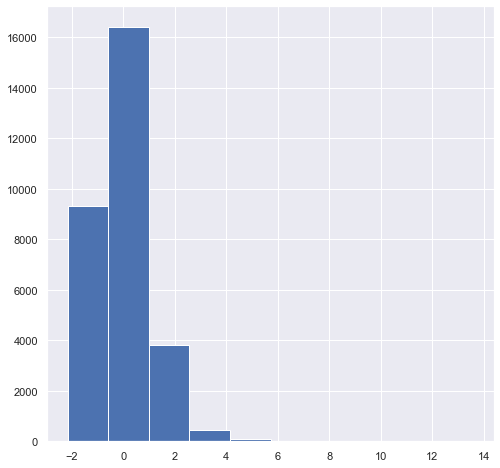

In [686]:
X['sqft_living'].hist()

<AxesSubplot:>

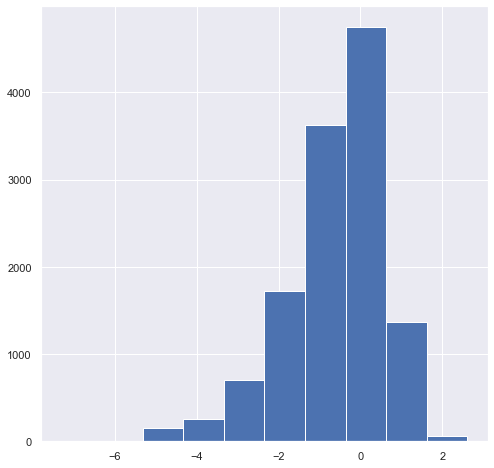

In [687]:
x_logged = np.log(X['sqft_living'])
x_logged.hist()

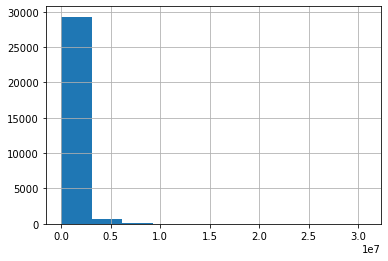

In [531]:
y.hist();

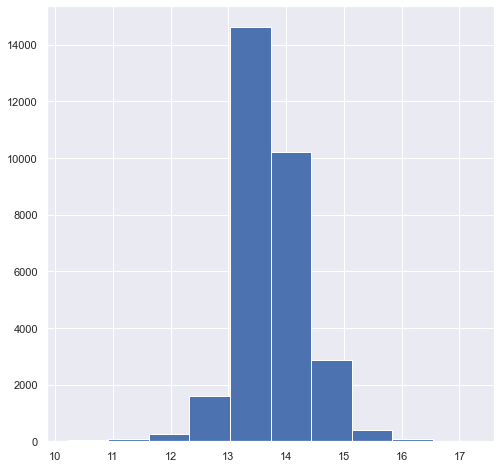

In [688]:
y_scld = np.log(y)
y_scld.hist();

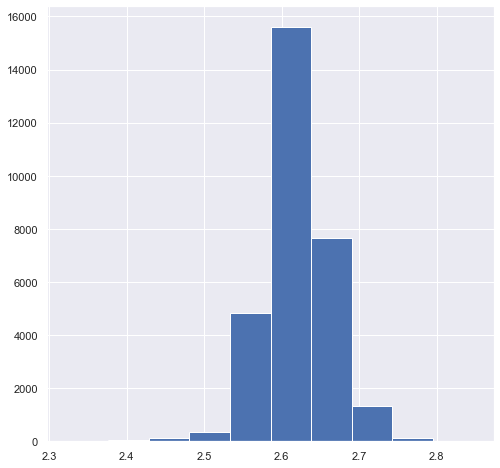

In [689]:
y_scld2 = np.log(y_scld)
y_scld2.hist();

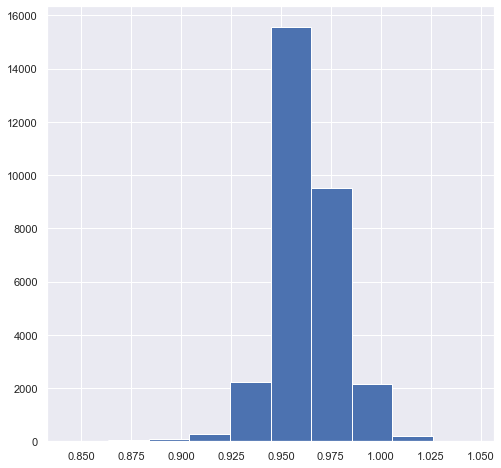

In [690]:
y_scld3 = np.log(y_scld2)
y_scld3.hist();

# Builded model with log-scaled target

In [691]:
model_diam = sm.OLS(y_scld, sm.add_constant(X)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.1
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:11:39   Log-Likelihood:                -16126.
No. Observations:               30111   AIC:                         3.247e+04
Df Residuals:                   30004   BIC:                         3.335e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.1679      0.414     31.789      0.000      12.356      13.980
bedrooms               -0.0285      0.003     -8.389      0.000      -0.035      -0.022
bathrooms               0.0650      0.004     14.818      0.000       0.056       0.074
sqft_living             0.0890      0.011      8.039      0.000       0.067       0.111
sqft_lot                0.0089      0.002      3.621      0.000       0.004       0.014
floors                  0.0070      0.003      2.012      0.044       0.000       0.014
sqft_above              0.0918      0.010      9.062      0.000       0.072       0.112
sqft_basement           0.0505      0.005     10.242      0.000       0.041       0.060
sqft_garage            -0.0322      0.003     -9.628      0.000      -0.039      -0.026
sqft_patio              0.0181      0.003      6.723      0.000       0.013       0.023
yr_built               -0.1110      0.004    -28.300      0.000      -0.119      -0.103
grade_10 Very Good      0.8895      0.418      2.127      0.033       0.070       1.709
grade_11 Excellent      1.0721      0.419      2.561      0.010       0.252       1.893
grade_12 Luxury         1.1027      0.420      2.626      0.009       0.280       1.926
grade_13 Mansion        0.7703      0.427      1.803      0.071      -0.067       1.608
grade_3 Poor           -0.2070      0.437     -0.473      0.636      -1.064       0.650
grade_4 Low            -0.0668      0.422     -0.158      0.874      -0.893       0.760
grade_5 Fair           -0.0990      0.418     -0.237      0.813      -0.919       0.721
grade_6 Low Average    -0.0298      0.418     -0.071      0.943      -0.849       0.789
grade_7 Average         0.1859      0.418      0.445      0.656      -0.633       1.005
grade_8 Good            0.4206      0.418      1.006      0.314      -0.399       1.240
grade_9 Better          0.6872      0.418      1.644      0.100      -0.132       1.506
condition_Average       0.2006      0.055      3.624      0.000       0.092       0.309
condition_Fair          0.1435      0.061      2.342      0.019       0.023       0.264
condition_Good          0.2358      0.055      4.257      0.000       0.127       0.344
condition_Very Good     0.2958      0.056      5.311      0.000       0.187       0.405
1924                   -0.5172      0.414     -1.248      0.212      -1.329       0.295
1928                   -0.2994      0.293     -1.022      0.307      -0.874       0.275
1940                    0.1325      0.239      0.554      0.580      -0.336       0.602
1942                   -0.2375      0.414     -0.573      0.566      -1.049       0.574
1945                   -0.0861      0.293     -0.294      0.769      -0.660       0.488
1946                    0.0506      0.414      0.122      0.903      -0.761       0.863
194

INTERPRETATION MODEL LOG_SCALED TARGET : 

The condition number is large, 1.23e+03. This might indicate that there are strong multicollinearity or other numerical problems.

# Creating Simple Regression Model 

In [521]:
# y = target ( dependent)
# X = independent variable
#type(X_base) - pandas.core.frame.DataFrame 
#type(y) - pandas.core.series.Series

y = df_cleaned['price']
X_base = df_cleaned['sqft_living']

In [462]:
y.shape #(30111,)

(30111,)

In [522]:
# Add constant

base_model = sm.OLS(y, sm.add_constant(X_base))
base_results = base_model.fit()

In [523]:
base_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:59:19   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

INTERPRETATION THE SIMPLE LINEAR REG. MODEL :

R2 = .370, sqft_living explains 37% of the variance in housing price

sqft_living coef = 560. on average price will increase in housing price. The feature (X variable = sqt_living) for evey 1 unit (sqft_living) in our feature , it increases our target by the coeff. 
The amount of target (y) increase or decrease by our coeff amount 

This model is not strong as enough.

# Multi Linear Reg


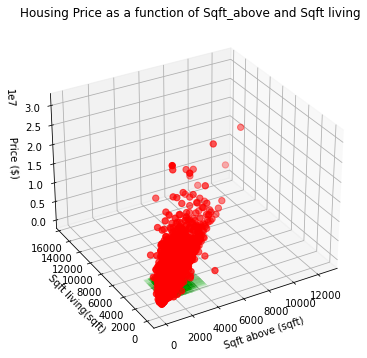

In [658]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(df_cleaned['sqft_above'], df_cleaned['sqft_living'], df_cleaned['price'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(df_cleaned['sqft_above'], df_cleaned['sqft_living'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('Sqft above (sqft)')
ax.set_ylabel('Sqft living(sqft)')
ax.set_zlabel('Price ($)')
plt.title('Housing Price as a function of Sqft_above and Sqft living');

INTERPRETATION THE PLOT :

There is positive strong correlation among sqft_living, sqft_above and price. X variables are directly related with house price.


In [698]:
# X2 = dum
y = df_cleaned['price']
X = X2

In [699]:

mlr1 = sm.OLS(y, sm.add_constant(X))
mlr1_res = mlr1.fit()

In [700]:
mlr1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:07   Log-Likelihood:            -4.4512e+05
No. Observations:               30111   AIC:                         8.904e+05
Df Residuals:                   30004   BIC:                         8.913e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 7.79e+05   6.38e+05      1.222      0.222   -4.71e+05    2.03e+06
bedrooms            -6.939e+04   5222.411    -13.286      0.000   -7.96e+04   -5.91e+04
bathrooms            9.239e+04   6752.238     13.684      0.000    7.92e+04    1.06e+05
sqft_living          1.132e+05    1.7e+04      6.641      0.000    7.98e+04    1.47e+05
sqft_lot            -1401.2430   3791.760     -0.370      0.712   -8833.257    6030.771
floors              -2.137e+04   5345.529     -3.997      0.000   -3.18e+04   -1.09e+04
sqft_above           1.788e+05   1.56e+04     11.462      0.000    1.48e+05    2.09e+05
sqft_basement        8.921e+04   7592.280     11.751      0.000    7.43e+04    1.04e+05
sqft_garage         -7.025e+04   5141.224    -13.664      0.000   -8.03e+04   -6.02e+04
sqft_patio           4.077e+04   4143.841      9.840      0.000    3.27e+04    4.89e+04
yr_built            -1.001e+05   6039.609    -16.580      0.000   -1.12e+05   -8.83e+04
grade_10 Very Good   1.002e+06   6.44e+05      1.556      0.120    -2.6e+05    2.26e+06
grade_11 Excellent   1.891e+06   6.44e+05      2.934      0.003    6.27e+05    3.15e+06
grade_12 Luxury      2.994e+06   6.47e+05      4.632      0.000    1.73e+06    4.26e+06
grade_13 Mansion     4.437e+06   6.58e+05      6.745      0.000    3.15e+06    5.73e+06
grade_3 Poor        -2.543e+04   6.73e+05     -0.038      0.970   -1.34e+06    1.29e+06
grade_4 Low          6.589e+04   6.49e+05      0.102      0.919   -1.21e+06    1.34e+06
grade_5 Fair         -5.57e+04   6.44e+05     -0.087      0.931   -1.32e+06    1.21e+06
grade_6 Low Average -7.127e+04   6.43e+05     -0.111      0.912   -1.33e+06    1.19e+06
grade_7 Average      1.353e+04   6.43e+05      0.021      0.983   -1.25e+06    1.27e+06
grade_8 Good         1.999e+05   6.43e+05      0.311      0.756   -1.06e+06    1.46e+06
grade_9 Better       5.304e+05   6.43e+05      0.824      0.410   -7.31e+05    1.79e+06
condition_Average    9.038e+04   8.52e+04      1.061      0.289   -7.66e+04    2.57e+05
condition_Fair       4.722e+04   9.44e+04      0.500      0.617   -1.38e+05    2.32e+05
condition_Good       1.242e+05   8.53e+04      1.456      0.145   -4.29e+04    2.91e+05
condition_Very Good  1.856e+05   8.57e+04      2.165      0.030    1.75e+04    3.54e+05
1924                -5.831e+05   6.38e+05     -0.914      0.361   -1.83e+06    6.67e+05
1928                -2.916e+05   4.51e+05     -0.647      0.518   -1.18e+06    5.92e+05
1940                  1.37e+04   3.68e+05      0.037      0.970   -7.08e+05    7.36e+05
1942                -1.417e+05   6.38e+05     -0.222      0.824   -1.39e+06    1.11e+06
1945                -3.032e+05   4.51e+05     -0.672      0.501   -1.19e+06    5.81e+05
1946                -1.663e+05   6.38e+05     -0.261      0.794   -1.42e+06    1.08e+06
194

In [702]:
df_cleaned.skew()

price             6.607691
bedrooms          0.517062
bathrooms         0.749936
sqft_living       1.611548
sqft_lot         21.277895
floors            0.626018
sqft_above        1.555986
sqft_basement     1.110095
sqft_garage       0.665501
sqft_patio        2.346323
yr_built         -0.356573
yr_renovated      4.366427
dtype: float64

INTERPRETATION THE MULTI LINEAR REG. MODEL :

R2 = .496, sqft_living explains 49.6% of the variance in housing price

It includes numeric and categorical data mixture. Prob(F-statistic) = 0.00, so the result is highly significant, so we reject the null hypothesis. In other words, the given regression makes sense.

This model is much more robust than linear regreession model. 

The condition number is large, 1.23e+03. This might indicate that there are strong multicollinearity or other numerical problems.

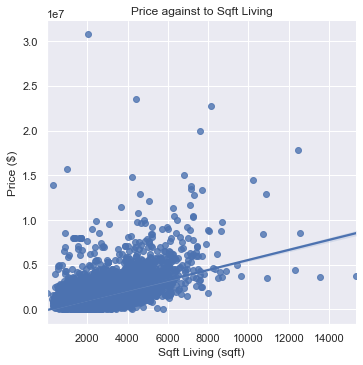

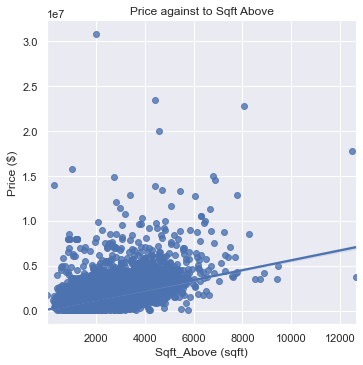

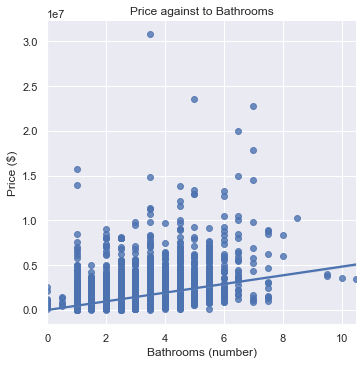

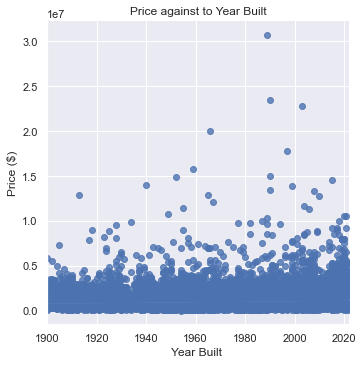

In [696]:
# Scatter Plot Y between X variables in order as below
# sqft_living,
# sqft_above, 
# bathrooms, 
# yr_built 

sns.lmplot(data=df_cleaned, x='sqft_living', y='price')
plt.xlabel('Sqft Living (sqft)')
plt.ylabel('Price ($)')
plt.title('Price against to Sqft Living');


sns.lmplot(data=df_cleaned, x='sqft_above', y='price')
plt.xlabel('Sqft_Above (sqft)')
plt.ylabel('Price ($)')
plt.title('Price against to Sqft Above');


sns.lmplot(data=df_cleaned, x='bathrooms', y='price')
plt.xlabel('Bathrooms (number)')
plt.ylabel('Price ($)')
plt.title('Price against to Bathrooms');



sns.lmplot(data=df_cleaned, x='yr_built', y='price')
plt.xlabel('Year Built ')
plt.ylabel('Price ($)')
plt.title('Price against to Year Built');


import pandas as pd
import scipy.stats as stats

df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")

sampling_difference = df['price'][df['sex'] == 'Male'] - \
                      df['price'][df['sex'] == 'Female']

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference \n with R value")
ax.set

plt.show()

# LINEARTIY

In [665]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [668]:
y = df_cleaned['price']
X = X2

In [670]:
mlr1_lr = mlr1_res.predict(X)
resids = y - mlr1_lr

fig, ax = plt.subplots()

ax.scatter(mlr1_lin, resids)

ax.set_xlabel('Predicted House Prices')
ax.set_ylabel('Residuals')
plt.suptitle('Residuals Vs. Predictions');

ValueError: shapes (30111,106) and (107,) not aligned: 106 (dim 1) != 107 (dim 0)

In [680]:
dw = sm.stats.stattools.durbin_watson


In [683]:
dw(resids)

NameError: name 'resids' is not defined

In [674]:
mlr1_res.summary().tables[2]

Omnibus:,43524.929,Durbin-Watson:,1.828
Prob(Omnibus):,0.000,Jarque-Bera (JB):,54730215.931
Skew:,8.190,Prob(JB):,0.00
Kurtosis:,211.217,Cond. No.,1.23e+03


# NORMALITY 

In [ ]:
resids.hist(bins=50);

In [ ]:
# hypothesis test , hystogram
# X 
# y 
#positive corr and neg corr and no corr 
# linear reg 